<img src="images (1).jpeg" alt="Image Alt Text" hight=150 width="600"/>

<a id="1"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c"> The scenario  will be as follows </p></b></h1>

* Importing the libraries
* load data and split 
* Data preprocessing
* apply hog 
* apply model(logestic, kmeans)                      
* confusion matrix
* classification report 
* Roc curve
* loss curve
* cross validation 

<a id="setup"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step1 | import Libraries</p></b></h1>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
from sklearn.model_selection import train_test_split, GridSearchCV
import cv2

<a id="data"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 2 | upload data</p></b></h1>

# load the data and preprocessing 

In [2]:
def load_data(data_directory, num_directories=2): 
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".png")]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(int(d))
            
    return images, labels 


<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 3 | Data split</p></b></h1>


In [3]:
from sklearn.model_selection import train_test_split

def load_and_split_data(data_directory, num_directories=2, test_size=0.2, random_state=42):
    # Load data using the provided code
    images, labels = load_data(data_directory, num_directories)

    # Split the data into training and testing sets
    images_train, images_test, labels_train, labels_test = train_test_split(
        images, labels, test_size=test_size, random_state=random_state,shuffle=True
    )

    return images_train, images_test, labels_train, labels_test , labels,images

In [9]:
data_directory = "cell_images"

In [10]:
images_train, images_test, labels_train, labels_test ,  labels,images = load_and_split_data(data_directory)

In [11]:
#let me show this lable

print( labels_train , labels_test)

[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 

# semi-circular pie chart showing data

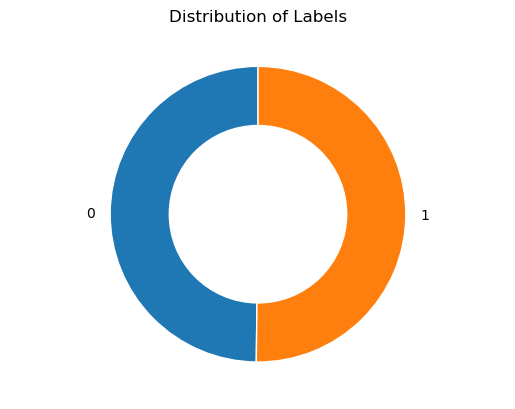

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Example labels (replace this with your actual labels)
labels = labels_train  

# Count the occurrences of each label
label_counts = Counter(labels)

# Get unique labels and their counts
unique_labels, counts = zip(*label_counts.items())

# Create a semi-circular pie chart
fig, ax = plt.subplots()
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plotting a semi-circular pie chart
wedges, _ = ax.pie(counts, labels=unique_labels, wedgeprops=dict(width=0.4), startangle=90)

# Convert pie chart to a semi-circle
for wedge in wedges:
    wedge.set_center((0, 0))
    wedge.set_edgecolor('white')

plt.title('Distribution of Labels')
plt.show()

<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 4 | preprocessing for hog</p></b></h1>

In [13]:
# Function to Preprocess Images for HOG
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA) #reducing the size  of images,goodin down scaling
        
        # Convert to grayscale if it has three channels
        if resized_img.shape[-1] == 3:
            grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        else:
            grayscale_img = resized_img
        
        processed_images.append(grayscale_img)
    return np.array(processed_images)

In [14]:
# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(images_train)
test_images_processed = preprocess_images_for_hog(images_test)

In [15]:
class_names = ["Uninfected", "Parasitized"]
class_names[labels_train[0]], class_names[labels_train[1]] 

('Uninfected', 'Parasitized')

22046
22046


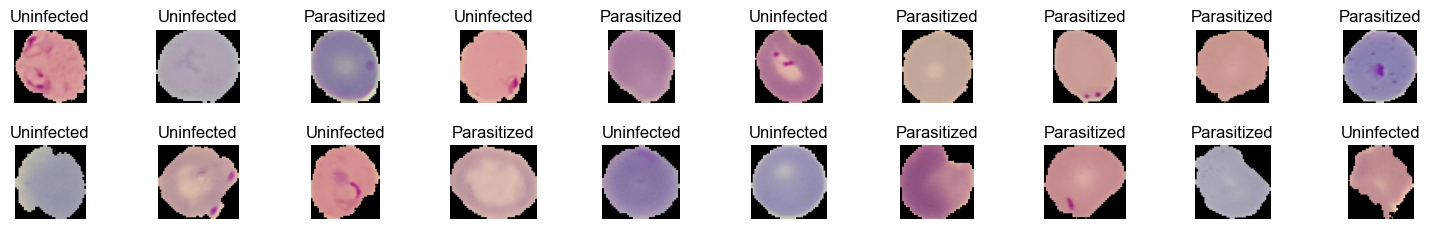

In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.figure(figsize=(15, 6))
plotnumber = 1

# Assuming 'images' and 'labels' are your data
# Check the lengths of 'images' and 'labels'
print(len(images))
print(len(labels))

# Ensure the lengths match or preprocess the data accordingly
min_length = min(len(images), len(labels))
images = images[:min_length]
labels = labels[:min_length]

for i in range(20):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_tr[i], cmap='binary')
        plt.axis('off')
        plt.title(class_names[y_train[i]], fontdict={'fontsize': 12, 'color': 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()


<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 5 | applay hog</p></b></h1>

* Histogram of Oriented Gradients (HOG) is a feature descriptor widely used in computer vision for object detection. Here's a brief overview:

* HOG Algorithm:
* Gradient Calculation: Compute the gradients (derivatives) of pixel intensities in both the horizontal and vertical directions.
* Orientation Binning: Group pixels based on their gradient orientation into histogram bins.
* Normalization: Normalize the histograms to reduce the impact of varying illumination conditions.
* Block Normalization: Further normalize groups of cells (blocks) to improve robustness.

* [HOG captures information about the local structure and orientation of edges, making it effective for detecting object boundaries in images].

# HOG feature for training

In [17]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    hog_img = hog(img, visualize=False)
    train_hog_features.append(hog_img)

# HOG feature for test

In [18]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img) 

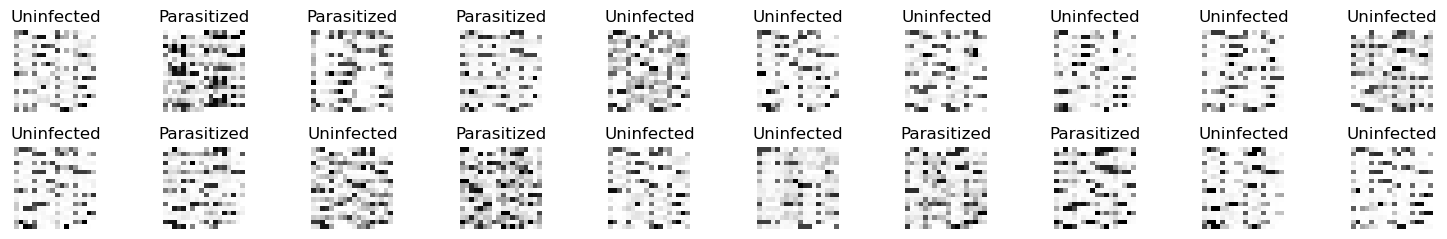

In [19]:
# let me show sample of images after hog
plt.figure(figsize=(15, 6))
plotnumber = 1

for i in range(20):
    if plotnumber <= 50:
        ax = plt.subplot(5, 10, plotnumber)
      
        plt.imshow(train_hog_features[i].reshape((18, 18)), cmap='binary')  
        plt.axis('off')
        plt.title(class_names[labels_train[i]], fontdict={'fontsize': 12, 'color': 'black'})

    plotnumber += 1

plt.tight_layout()
plt.show()


# showing shape of data

In [20]:
# Convert processed images and labels to NumPy arrays
train_images_processed = np.array(train_images_processed)
test_images_processed = np.array(test_images_processed)
train_hog_features = np.array(train_hog_features)
test_hog_features = np.array(test_hog_features)

# Convert labels to NumPy arrays
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)

# Display the shapes
print(
    "Processed Image Shapes:",
    train_images_processed.shape,
    test_images_processed.shape,
 
)
print(
    "Labels Shapes:",
    labels_train.shape,
    labels_test.shape
)

Processed Image Shapes: (22046, 32, 32) (5512, 32, 32)
Labels Shapes: (22046,) (5512,)


<a id="preprocessing"></a>
<h1><b><p style="background-image: url(https://i.postimg.cc/0Qwf8YX6/2927262.jpg);font-family:camtasia;font-size:110%;color:white;text-align:center;border-radius:15px 50px; padding:7px; border:solid 2px #09375b; box-shadow: 10px 10px 10px #042b4c">Step 5 | building model</p></b></h1>

In [21]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train_hog_features, labels_train)

LogisticRegression(max_iter=1000)

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.1.1 | </span><span style="color:#ff6200"> prediction and accuracy</span></b></h2>

In [22]:
# Predict on test set
predictions = logreg.predict(test_hog_features)


# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f"Accuracy of logistic regression with HOG features: {accuracy}")

Accuracy of logistic regression with HOG features: 0.8131349782293179


<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.1.1.1 | </span><span style="color:#ff6200">when apply grid search</span></b></h2>

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter values
    'max_iter': [100, 500, 1000, 1500, 2000]  # Maximum number of iterations
    
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,   # Number of cross-validation folds
    scoring='accuracy',  # Use accuracy as the metric to evaluate
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(train_hog_features, labels_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train logistic regression with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(train_hog_features, labels_train)

# Predict on the test set using the tuned model
predictions = best_logreg.predict(test_hog_features)

# Calculate accuracy
accuracy = accuracy_score(labels_test, predictions)
print(f"Accuracy of logistic regression with tuned hyperparameters: {accuracy}")

Best Hyperparameters: {'C': 10, 'max_iter': 500}
Accuracy of logistic regression with tuned hyperparameters: 0.8154934687953556



<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.1.2 | </span><span style="color:#ff6200"> classification report</span></b></h2>

In [24]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      2797
           1       0.83      0.79      0.81      2715

    accuracy                           0.82      5512
   macro avg       0.82      0.82      0.82      5512
weighted avg       0.82      0.82      0.82      5512



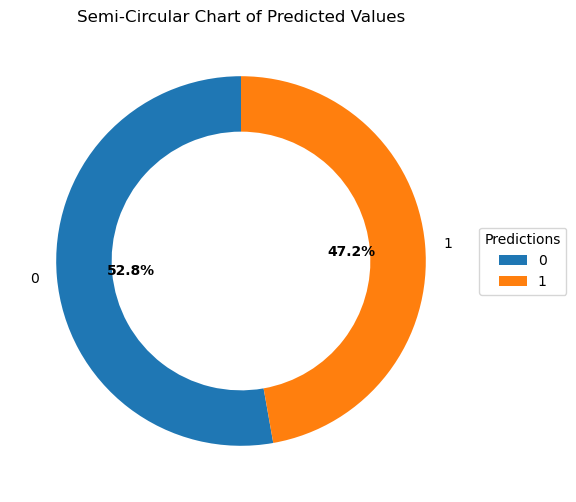

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming 'predictions' variable contains the predicted values from logistic regression

# Calculate counts of each unique prediction
predicted_counts = Counter(predictions)

# Get unique predicted values and their counts
unique_predictions, counts = zip(*predicted_counts.items())

# Plotting the semi-circular chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Create a pie chart
wedges, texts, autotexts = ax.pie(counts, labels=unique_predictions, autopct='%1.1f%%',
                                  wedgeprops=dict(width=0.3), startangle=90)

# Formatting labels and aesthetics
ax.legend(wedges, unique_predictions, title="Predictions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Semi-Circular Chart of Predicted Values")

plt.show()

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.1.3 | </span><span style="color:#ff6200"> ROC (receiver operating characteristic)</span></b></h2>
 ROC helps visualize and understand how well a model distinguishes between classes.

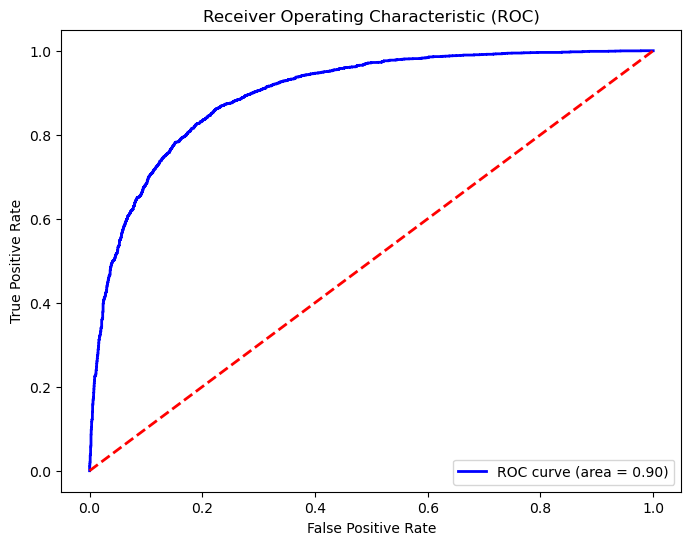

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

lb = LabelBinarizer()
labels_test_binary = lb.fit_transform(labels_test)

# Compute probabilities for the test set
probabilities = logreg.predict_proba(test_hog_features)
positive_probs = probabilities[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(labels_test_binary, positive_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.1.3 | </span><span style="color:#ff6200"> confusion matrix</span></b></h2>

In [27]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(labels_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2345  452]
 [ 565 2150]]


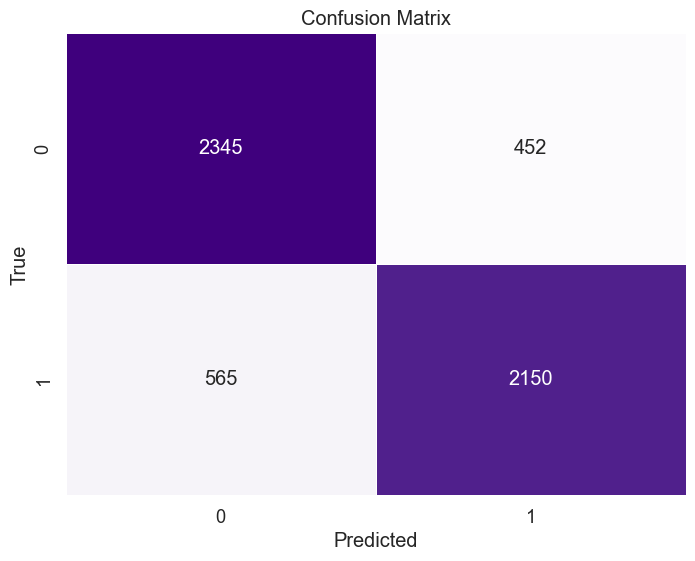

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(labels_test, predictions)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix') 
plt.show()

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.1.4 | </span><span style="color:#ff6200">loss curve for logistic regression</span></b></h2>

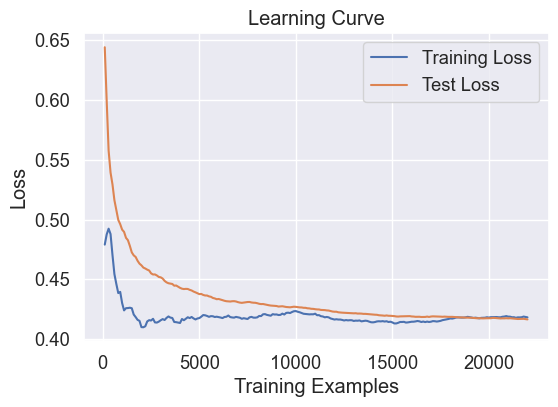

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

#

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)


train_losses = []
test_losses = []

# Training the model and calculating loss for each iteration
for i in range(100, len(train_hog_features), 100):  #  step size 
    logreg.fit(train_hog_features[:i], labels_train[:i])
    train_pred = logreg.predict_proba(train_hog_features[:i])
    test_pred = logreg.predict_proba(test_hog_features)
    
    train_loss = log_loss(labels_train[:i], train_pred)
    test_loss = log_loss(labels_test, test_pred)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the learning curve
plt.figure(figsize=(6, 4))
plt.plot(range(100, len(train_hog_features), 100), train_losses, label='Training Loss')
plt.plot(range(100, len(train_hog_features), 100), test_losses, label='Test Loss')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Loss')
plt.legend()
plt.show()


<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.2 | </span><span style="color:#ff6200">k means</span></b></h2>

In [30]:
# Apply K-means clustering to the HOG features
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(train_hog_features)

# Predict clusters for the test HOG features
test_clusters = kmeans.predict(test_hog_features)

train_clusters = kmeans.labels_ 

C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:

print("labels:",train_clusters) 

labels: [1 0 1 ... 0 0 1]


In [32]:
# Compute accuracy of K-means clustering
accuracy = accuracy_score(labels_test, test_clusters)
print("Accuracy:", accuracy)


Accuracy: 0.5058055152394775


In [33]:
# Display shape of processed images  
print("Shape of processed images:", train_images_processed.shape)

Shape of processed images: (22046, 32, 32)


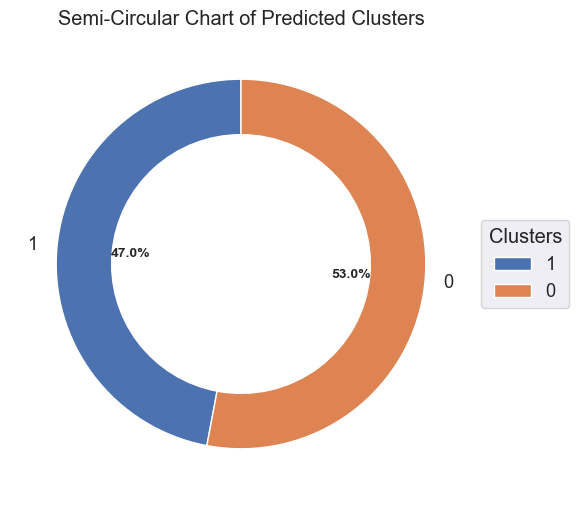

In [34]:
import matplotlib.pyplot as plt
from collections import Counter


# Calculate counts of each unique cluster prediction
cluster_counts = Counter(test_clusters)

# Get unique predicted clusters and their counts
unique_clusters, counts = zip(*cluster_counts.items())

# Plotting the semi-circular chart
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

# Create a pie chart
wedges, texts, autotexts = ax.pie(counts, labels=unique_clusters, autopct='%1.1f%%',
                                  wedgeprops=dict(width=0.3), startangle=90)

# Formatting labels and aesthetics
ax.legend(wedges, unique_clusters, title="Clusters", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Semi-Circular Chart of Predicted Clusters")

plt.show()

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.2.1 | </span><span style="color:#ff6200">classification report</span></b></h2>

In [35]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, test_clusters))

              precision    recall  f1-score   support

           0       0.51      0.53      0.52      2797
           1       0.50      0.48      0.49      2715

    accuracy                           0.51      5512
   macro avg       0.51      0.51      0.51      5512
weighted avg       0.51      0.51      0.51      5512



<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.2.2 | </span><span style="color:#ff6200">confusion matrix</span></b></h2>


In [36]:
from sklearn.metrics import confusion_matrix

# Compare known labels with K-means predicted clusters
conf_matrix = confusion_matrix(labels_test, test_clusters)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1496 1301]
 [1423 1292]]


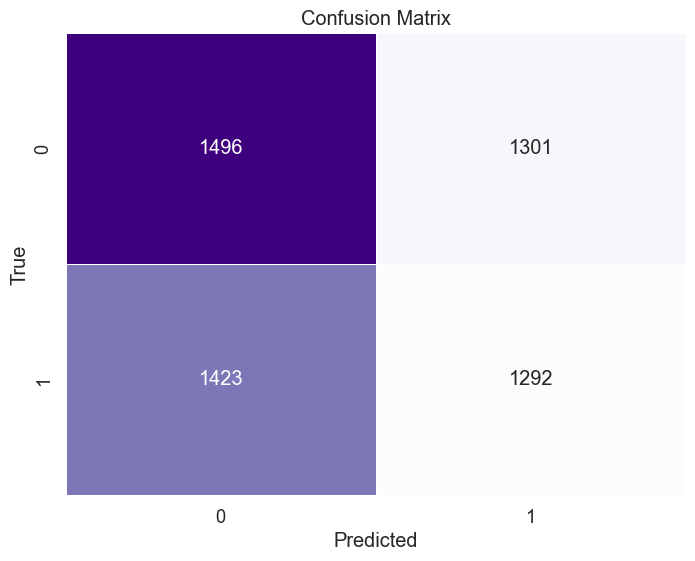

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Compare known labels with K-means predicted clusters
conf_matrix = confusion_matrix(labels_test, test_clusters)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # the font size 
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Purples')

# Adjust labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


# Show plot
plt.show()

<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.2.2 | </span><span style="color:#ff6200">loss curve</span></b></h2>


C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

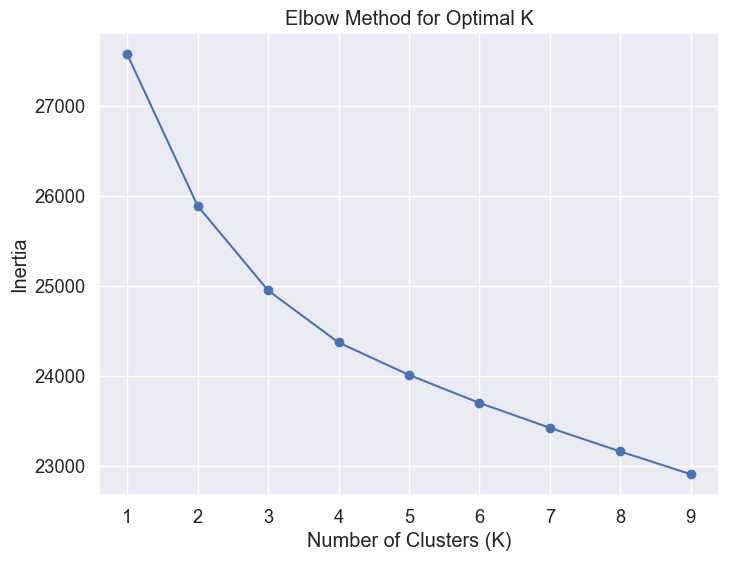

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize lists to hold inertias for different K values
inertias = []
K_range = range(1, 10)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_hog_features)
    inertias.append(kmeans.inertia_)

# Plotting the inertia values for different K values
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.3 | </span><span style="color:#ff6200">cross validation</span></b></h2>

![](1280px-K-fold_cross_validation_EN.svg.png)

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
accuracy_scores = cross_val_score(logreg, train_hog_features, labels_train, cv=kfold)
accuracy_scores


array([0.81405896, 0.81401678, 0.80562486, 0.79882059, 0.80789295])

In [40]:
# printing the average score
print (np.mean(accuracy_scores)) 

0.8080828278994368


In [41]:
from sklearn.model_selection import cross_val_predict
accuracy_scores_predict = cross_val_score(logreg, test_hog_features, labels_test, cv=kfold)
accuracy_scores_predict


array([0.81595648, 0.81323663, 0.79945554, 0.79128857, 0.79219601])

In [42]:

# printing the average score   
print (np.mean(accuracy_scores_predict))

0.8024266437187476


<a id="missing"></a>
<h2><b><span style="color:#005f26">🔶 Step 5.2.3 | </span><span style="color:#ff6200">when applay hyper parameter</span></b></h2>



In [43]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_clusters': [2, 3, 4, 5]}  

# Create a KMeans instance
kmeans = KMeans(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(train_hog_features)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Refit KMeans using the best hyperparameters
best_kmeans = KMeans(n_clusters=best_params['n_clusters'], random_state=42)
best_kmeans.fit(train_hog_features)

# Predict clusters for test HOG features using the best KMeans model
test_clusters = best_kmeans.predict(test_hog_features)

# Compute accuracy of K-means clustering with the best hyperparameters
accuracy = accuracy_score(labels_test, test_clusters)
print("Accuracy with best hyperparameters:",accuracy)

C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to na

Best Hyperparameters: {'n_clusters': 2}


C:\Users\mohaz\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy with best hyperparameters: 0.5058055152394775


<div style="display: flex; align-items: center;">
    <div style="flex: 1;">
        <img src="photo_2023-12-18_00-25-17.jpg" alt="Image Alt Text" width="500">
    </div>
    
</div>


<img src="Mem2.gif" alt="Image Alt Text" hight=150 width="600"/>